In [249]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math, random
from scipy.stats import linregress
from scipy.stats import norm
import statsmodels 
import statsmodels.api as sm
from statsmodels.tools import add_constant
import pandas_datareader
from pandas_datareader import data as wb # Get API from Alpha Vantage, IEX Cloud, or Quandl to pull data
import quandl
import yfinance as yf # Yahoo Finance

**1. Import stock data**

**Import a Single Security**

In [10]:
#PG = wb.DataReader('PG', data_source='yahoo', start='1995-1-1')
PG = yf.download('PG', start='1995-1-1')
PG.info()

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7518 entries, 1995-01-03 00:00:00+00:00 to 2024-11-11 00:00:00+00:00
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Adj Close, PG)  7518 non-null   float64
 1   (Close, PG)      7518 non-null   float64
 2   (High, PG)       7518 non-null   float64
 3   (Low, PG)        7518 non-null   float64
 4   (Open, PG)       7518 non-null   float64
 5   (Volume, PG)     7518 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 411.1 KB


In [22]:
PG.head()
#PG.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,PG,PG,PG,PG,PG,PG
Date,,,,,,
1995-01-03 00:00:00+00:00,7.441166,15.59375,15.62500,15.43750,15.46875,3318400
1995-01-04 00:00:00+00:00,7.381514,15.46875,15.65625,15.31250,15.53125,2218800
1995-01-05 00:00:00+00:00,7.277132,15.25000,15.43750,15.21875,15.37500,2319600
1995-01-06 00:00:00+00:00,7.292045,15.28125,15.40625,15.15625,15.15625,3438000
1995-01-09 00:00:00+00:00,7.262218,15.21875,15.40625,15.18750,15.34375,1795200


**Import Multiple Securities**

In [57]:
# Procter & Gamble, Microsoft, AT&T, Ford, General Electric
tickers = ['PG','MSFT', 'T', 'F', 'GE']
my_data = pd.DataFrame()
for t in tickers:
    my_data[t] = yf.download(t, start='1995-1-1')['Adj Close']
my_data.info()
# my_data.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7518 entries, 1995-01-03 00:00:00+00:00 to 2024-11-11 00:00:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      7518 non-null   float64
 1   MSFT    7518 non-null   float64
 2   T       7518 non-null   float64
 3   F       7518 non-null   float64
 4   GE      7518 non-null   float64
dtypes: float64(5)
memory usage: 352.4 KB


In [19]:
#quandl.ApiConfig.api_key = 'your_api_key_here'
# mydata01 = quandl.get('FRED/GDP')
# mydata01.tail()

**2. Calculate Rate of Return**

**Simple Rate of Return** *(used for an investment portfolio of multiple securities in the same timeframe)*

**r = (P1- P0)/P0 = P1/P0 - 1**

In [25]:
PG['simple_return']= PG['Adj Close'] / PG['Adj Close'].shift(1) - 1
print(PG['simple_return'])

Date
1995-01-03 00:00:00+00:00         NaN
1995-01-04 00:00:00+00:00   -0.008017
1995-01-05 00:00:00+00:00   -0.014141
1995-01-06 00:00:00+00:00    0.002049
1995-01-09 00:00:00+00:00   -0.004090
                               ...   
2024-11-05 00:00:00+00:00    0.004119
2024-11-06 00:00:00+00:00   -0.028415
2024-11-07 00:00:00+00:00    0.014654
2024-11-08 00:00:00+00:00    0.026314
2024-11-11 00:00:00+00:00   -0.010017
Name: simple_return, Length: 7518, dtype: float64


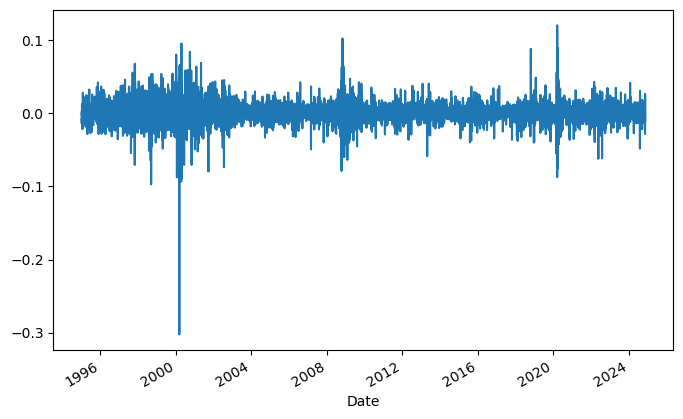

In [32]:
PG['simple_return'].plot(figsize=(8,5))
plt.show()

In [27]:
# Avg daily simple return
avg_return_d = PG['simple_return'].mean()
avg_return_d

0.0005097035414296149

In [42]:
# Avg annual simple return (excluding holidays)
avg_return_a = PG['simple_return'].mean() * 250
print(str(round(avg_return_a,5)*100) + "%")

12.742999999999999%


**Log Returns** *(used for a single security over time)*

**r = ln (Pt / P(t-1))**

In [43]:
PG.head()

Price,Adj Close,Close,High,Low,Open,Volume,simple_return
Ticker,PG,PG,PG,PG,PG,PG,
Date,,,,,,,
1995-01-03 00:00:00+00:00,7.441166,15.59375,15.62500,15.43750,15.46875,3318400,NaN
1995-01-04 00:00:00+00:00,7.381514,15.46875,15.65625,15.31250,15.53125,2218800,-0.008017
1995-01-05 00:00:00+00:00,7.277132,15.25000,15.43750,15.21875,15.37500,2319600,-0.014141
1995-01-06 00:00:00+00:00,7.292045,15.28125,15.40625,15.15625,15.15625,3438000,0.002049
1995-01-09 00:00:00+00:00,7.262218,15.21875,15.40625,15.18750,15.34375,1795200,-0.004090


In [44]:
PG['log_return'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))
print(PG['log_return'])

Date
1995-01-03 00:00:00+00:00         NaN
1995-01-04 00:00:00+00:00   -0.008049
1995-01-05 00:00:00+00:00   -0.014242
1995-01-06 00:00:00+00:00    0.002047
1995-01-09 00:00:00+00:00   -0.004099
                               ...   
2024-11-05 00:00:00+00:00    0.004111
2024-11-06 00:00:00+00:00   -0.028826
2024-11-07 00:00:00+00:00    0.014548
2024-11-08 00:00:00+00:00    0.025974
2024-11-11 00:00:00+00:00   -0.010068
Name: log_return, Length: 7518, dtype: float64


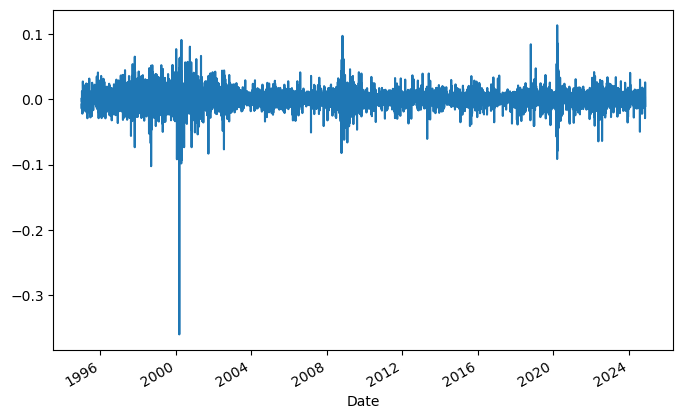

In [45]:
PG['log_return'].plot(figsize=(8,5))
plt.show()

In [48]:
# Avg daily log return
log_return_d = PG['log_return'].mean()
log_return_d

0.00041308246330908825

In [49]:
# Avg annual log return (excluding holidays)
log_return_a = PG['log_return'].mean() * 250
print(str(round(log_return_a,5)*100) + "%")

10.327%


**Expected Rate of Return** *(for a portfolio using historical rate of return)*

**E(X) = w1*X1  + w2*X2 + ... + wn*Xn**

**Normalization to 100:** Pt/P0 * 100

In [60]:
my_data.head()

,PG,MSFT,T,F,GE
Date,,,,,
1995-01-03 00:00:00+00:00,7.441166,2.319452,2.369482,3.569731,20.233561
1995-01-04 00:00:00+00:00,7.381517,2.336314,2.363453,3.665778,20.233561
1995-01-05 00:00:00+00:00,7.277132,2.297776,2.400383,3.633764,20.283165
1995-01-06 00:00:00+00:00,7.292047,2.336314,2.400383,3.633764,20.183971
1995-01-09 00:00:00+00:00,7.262219,2.321861,2.392997,3.697794,19.985605


In [61]:
# Get first row of data
my_data.iloc[0]

PG       7.441166
MSFT     2.319452
T        2.369482
F        3.569731
GE      20.233561
Name: 1995-01-03 00:00:00+00:00, dtype: float64

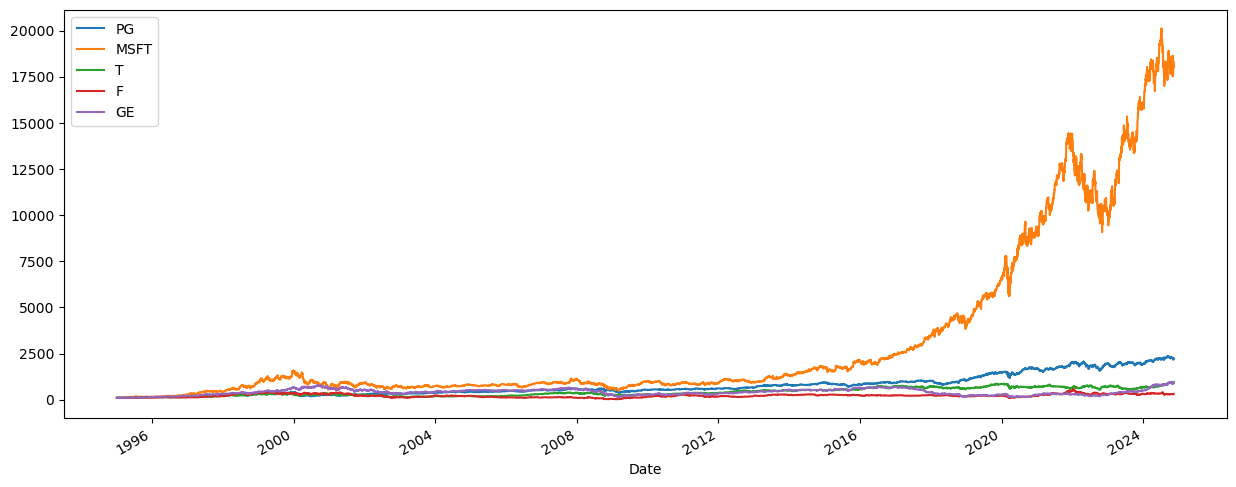

In [65]:
# Normalization
(my_data / my_data.iloc[0] * 100).plot(figsize=(15,6));
plt.show()

Microsoft exceeded performance from 1996 to present. Ford and General Electric's returns are significantly lower during the same timeframe.

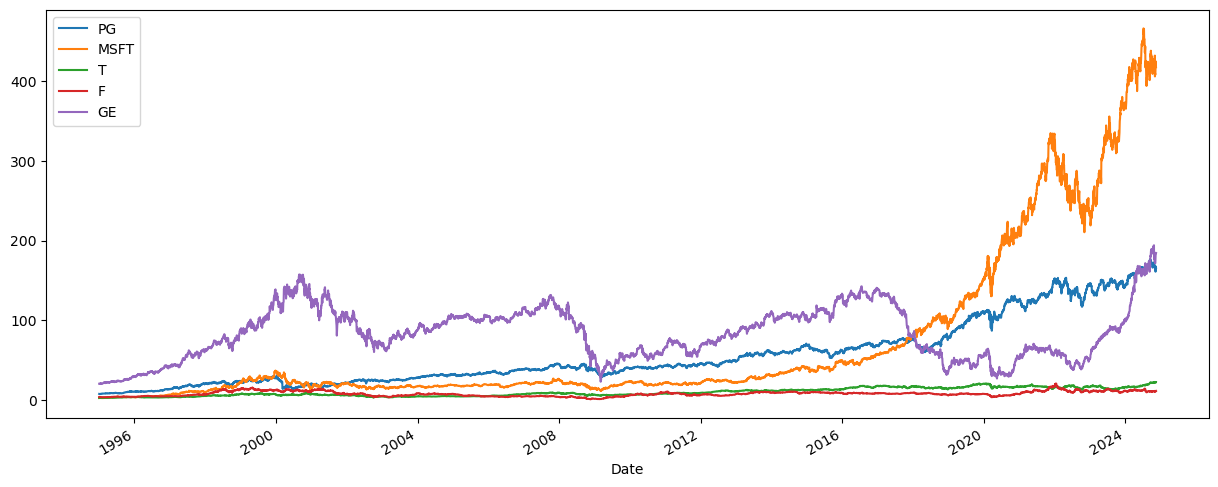

In [63]:
# Without normalization
my_data.plot(figsize=(15,6))
plt.show()

In [64]:
my_data.loc['1995-01-03'] # similar to getting first row of data

PG       7.441166
MSFT     2.319452
T        2.369482
F        3.569731
GE      20.233561
Name: 1995-01-03 00:00:00+00:00, dtype: float64

**Calculate the Return of a Portfolio of Securities**

In [70]:
# Simple return
returns = my_data / my_data.shift(1) - 1
returns.head()

,PG,MSFT,T,F,GE
Date,,,,,
1995-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
1995-01-04 00:00:00+00:00,-0.008016,0.007270,-0.002544,0.026906,0.000000
1995-01-05 00:00:00+00:00,-0.014141,-0.016495,0.015625,-0.008733,0.002452
1995-01-06 00:00:00+00:00,0.002050,0.016772,0.000000,0.000000,-0.004890
1995-01-09 00:00:00+00:00,-0.004090,-0.006186,-0.003077,0.017621,-0.009828


In [72]:
# Portfolio weights
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
np.dot(returns,weights)

array([            nan,  4.72306114e-03, -4.25859961e-03, ...,
       -6.41796520e-04,  1.34738165e-02,  5.34135827e-05])

In [74]:
# Annual rate of return
annual_returns = returns.mean() * 250
annual_returns

PG      0.127426
MSFT    0.220724
T       0.108393
F       0.118410
GE      0.124306
dtype: float64

In [78]:
# Portfolio 1 rate of return
pf1 = str(round(np.dot(annual_returns,weights),5) * 100) + "%"
print(pf1)

13.985%


In [80]:
# Portfolio 2 rate of return
weights2 = np.array([0.1, 0.25, 0.25, 0.15, 0.25])
pf2 = str(round(np.dot(annual_returns,weights2),5) * 100) + "%"
print(pf1)
print(pf2)

13.985%
14.386%


**Calculate Rate of Return of Indices**

In [82]:
# SP500, NASDAQ, German DAX, London FTSE (Footsie)
tickers = ['^GSPC','^IXIC','^GDASC','^FTSE']
ind_data = pd.DataFrame()
for t in tickers:
    ind_data[t] = yf.download(t, start='1995-1-1')['Adj Close']
ind_data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['^GDASC']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


,^GSPC,^IXIC,^GDASC,^FTSE
Date,,,,
1995-01-03 00:00:00+00:00,459.109985,743.580017,NaN,3065.699951
1995-01-04 00:00:00+00:00,460.709991,745.840027,NaN,3051.600098
1995-01-05 00:00:00+00:00,460.339996,745.659973,NaN,3032.300049
1995-01-06 00:00:00+00:00,460.679993,749.690002,NaN,3065.000000
1995-01-09 00:00:00+00:00,460.829987,752.090027,NaN,3055.800049


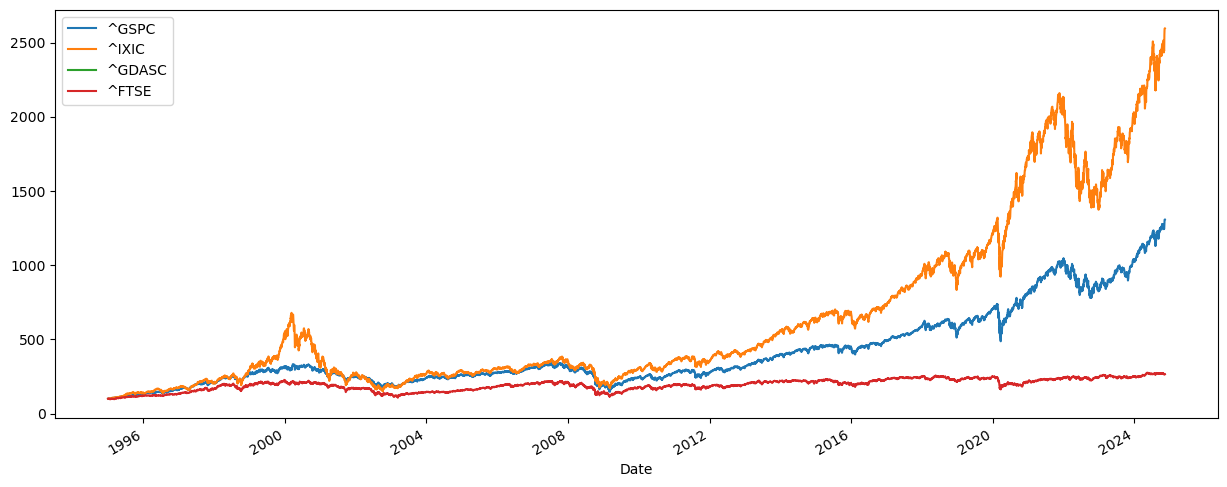

In [84]:
# Normalization to 100
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15,6))
plt.show()

In [85]:
# Simple daily return
ind_returns = ind_data / ind_data.shift(1) - 1
ind_returns.tail()

,^GSPC,^IXIC,^GDASC,^FTSE
Date,,,,
2024-11-05 00:00:00+00:00,0.012266,0.014257,NaN,-0.001442
2024-11-06 00:00:00+00:00,0.025296,0.029519,NaN,-0.000697
2024-11-07 00:00:00+00:00,0.007431,0.015065,NaN,-0.003184
2024-11-08 00:00:00+00:00,0.003757,0.000899,NaN,-0.008390
2024-11-11 00:00:00+00:00,0.000969,0.000621,NaN,0.006541


In [86]:
# Simple annual return
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^GSPC     0.103214
^IXIC     0.137748
^GDASC         NaN
^FTSE     0.045702
dtype: float64

NASDAQ outperforms the other three indices.

In [87]:
tickers = ['PG','^GSPC','^DGI']
data = pd.DataFrame()
for t in tickers:
    data[t] = yf.download(t, start='1995-1-1')['Adj Close']
data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['^DGI']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


,PG,^GSPC,^DGI
Date,,,
1995-01-03 00:00:00+00:00,7.441168,459.109985,NaN
1995-01-04 00:00:00+00:00,7.381517,460.709991,NaN
1995-01-05 00:00:00+00:00,7.277131,460.339996,NaN
1995-01-06 00:00:00+00:00,7.292048,460.679993,NaN
1995-01-09 00:00:00+00:00,7.262218,460.829987,NaN


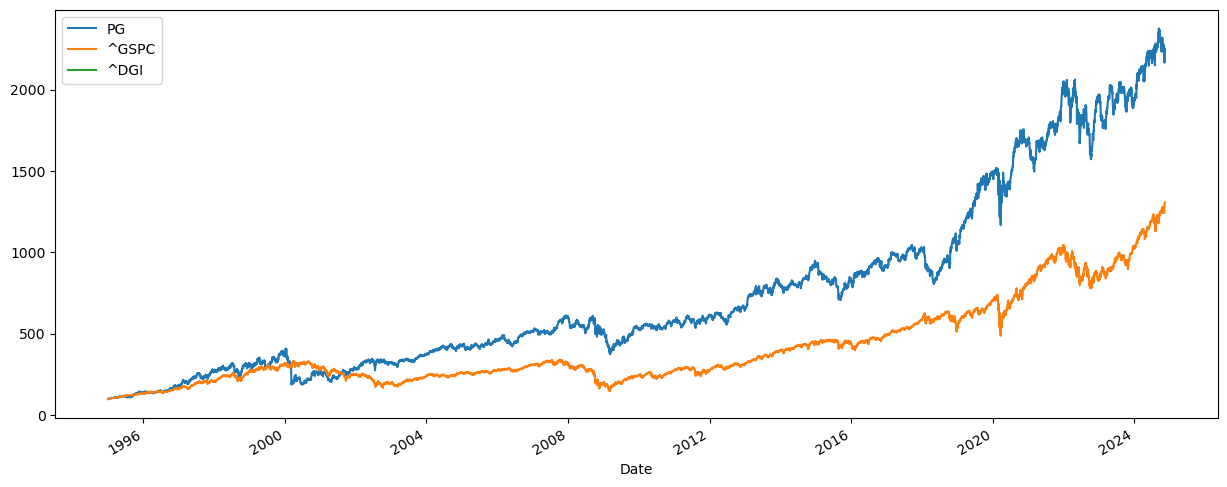

In [88]:
# Normalization to 100
(data / data.iloc[0] * 100).plot(figsize=(15,6))
plt.show()

PG performed better than the index.

**3. Calculate Risk**

**Calculate a Security's Risk** (using standard deviation - dispersion of data points around the mean)

In [91]:
# Compare 2 stocks
tickers = ['PG','JPM'] # or BEI.DE (Beiersdorf)
sec_data = pd.DataFrame()
for t in tickers:
    sec_data[t] = yf.download(t, start='1995-1-1')['Adj Close']
sec_data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,PG,JPM
Date,,
1995-01-03 00:00:00+00:00,7.441165,5.185969
1995-01-04 00:00:00+00:00,7.381516,5.275383
1995-01-05 00:00:00+00:00,7.277137,5.329031
1995-01-06 00:00:00+00:00,7.292042,5.346915
1995-01-09 00:00:00+00:00,7.262218,5.382679


In [93]:
# Log return
sec_returns = np.log(sec_data/sec_data.shift(1))
sec_returns.head()

,PG,JPM
Date,,
1995-01-03 00:00:00+00:00,NaN,NaN
1995-01-04 00:00:00+00:00,-0.008048,0.017095
1995-01-05 00:00:00+00:00,-0.014242,0.010118
1995-01-06 00:00:00+00:00,0.002046,0.003350
1995-01-09 00:00:00+00:00,-0.004098,0.006666


In [95]:
# PG
# Avg log return
sec_returns['PG'].mean()

0.00041308248888350903

In [105]:
# Annual avg log return
sec_returns['PG'].mean() * 250

0.10327062222087725

In [97]:
# Standard deviation
sec_returns['PG'].std()

0.013965140635813306

In [98]:
# Annual standard deviation
sec_returns['PG'].std() * 250 ** 0.5

0.22080826126871025

In [99]:
# JPM
# Avg log return
sec_returns['JPM'].mean()

0.0005097405204070914

In [106]:
# Annual avg log return
sec_returns['JPM'].mean() * 250

0.12743513010177285

In [101]:
# Standard deviation
sec_returns['JPM'].std()

0.023146592942354948

In [102]:
# Annual standard deviation
sec_returns['JPM'].std() * 250 ** 0.5

0.36597976885310063

In [108]:
# Compare annual avg log returns
sec_returns[['PG','JPM']].mean()*250

PG     0.103271
JPM    0.127435
dtype: float64

In [109]:
# Compare annual std dev
sec_returns[['PG','JPM']].std()*250**0.5

PG     0.220808
JPM    0.365980
dtype: float64

JPM has higher rate of return and higher volatility.

**Covariance between Stocks**

 Correlation coefficient: **phi(xy) = Cov(xy) / (Sigma x * Sigma y) = (x - xbar)(y - ybar) / (Sigma x * Sigma y)** (adjusts covariance: [-1,1])

Covariance: **Sigma xy = (x - xbar)(y - ybar) / (n -1)** (>0: same direction, <0: opposite direction, =0: independent)

**Covariance and Correlation:**

Covariance Matrix:

var(PG)=sigma^2 &emsp;&emsp; | cov(PG,JPM)=sigma xy


cov(JPM,PG)=sigma xy | var(JPM)=sigma^2

In [110]:
# PG variance
PG_var = sec_returns['PG'].var()
PG_var

0.00019502515297804406

In [111]:
# PG annual variance
PG_var_a = sec_returns['PG'].var() * 250
PG_var_a

0.04875628824451102

In [112]:
# JPM variance
JPM_var = sec_returns['JPM'].var()
JPM_var

0.0005357647648390759

In [114]:
# JPM variance
JPM_var_a = sec_returns['JPM'].var() * 250
JPM_var_a

0.13394119120976897

In [116]:
# Covariance matrix
cov_matrix = sec_returns.cov()
cov_matrix

,PG,JPM
PG,0.000195,0.000096
JPM,0.000096,0.000536


In [119]:
# Covariance matrix - annual
cov_matrix_a = sec_returns.cov() * 250
cov_matrix_a

,PG,JPM
PG,0.048756,0.024005
JPM,0.024005,0.133941


In [117]:
# Correlation matrix
corr_matrix = sec_returns.corr()
corr_matrix

,PG,JPM
PG,1.000000,0.297052
JPM,0.297052,1.000000


This is the correlation between the 2 stocks' returns, not prices. We do not annualize the correlation matrix.

**Calculate a Portfolio's Risk of Multiple Stocks**

Portfolio Variance (2 stocks):
    
**(w1 x s1 + w2 x s2)^2 = (w1 x s1)^2 + 2 x w1 x s1 x w2 x s2 x p12  + (w2 x s2)^2**

Expected Return Standard Deviation = sqrt(Portfolio Variance)

(ab)^2 = a^2 x b^2

(aB)^2 = aT x B x a (a: vector, aT: transposed vector, B: matrix)

(w x Cov)^2 = wT x Cov x w (single number)

In [121]:
# Equal weighting scheme
weights = np.array([0.5,0.5]) # vertical vector

In [136]:
# Portfolio variance
pf_var = np.dot(weights.T, np.dot(sec_returns.cov()*250, weights))
pf_var

0.05767696698859824

In [137]:
# Portfolio volatility (std dev)
pf_vol = pf_var ** 0.5
print(str(round(pf_vol,5)*100) + "%")

24.016000000000002%


**Calculate Non-diversifiable (Systematic) Risk vs Diversifiable (Idiosyncratic) Risk of a Portfolio**

Undiversifiable risk: depends on the variance of an individual security *(cannot be eliminated)*

Diversifiable risk (unsystematic: company-specific risk, driven by company-specific events *(disappears if portfolio has more than 25-30 securities)* = Portfolio variance - Weighted annual variances

In [128]:
# Equal weighting scheme
weights = np.array([0.5,0.5]) 

In [129]:
weights[0]

0.5

In [130]:
weights[1]

0.5

In [139]:
# Diversifiable risk
PG_var_a = sec_returns['PG'].var() * 250
PG_var_a

0.04875628824451102

In [140]:
JPM_var_a = sec_returns['JPM'].var() * 250
JPM_var_a

0.13394119120976897

In [142]:
dr = pf_var - (weights[0]**2*PG_var_a) - (weights[1]**2*JPM_var_a) 
print(str(round(dr*100,3)) + "%")

1.2%


In [144]:
# Systematic risk (non-diversifiable risk)
n_dr_1 = pf_var - dr
n_dr_1

0.04567436986356999

In [145]:
n_dr_2 = (weights[0]**2*PG_var_a) + (weights[1]**2*JPM_var_a) 
n_dr_2

0.04567436986357

In [147]:
round(n_dr_1,5) == round(n_dr_2,5)

True

**4. Regression Analysis**

**Y = a + bX + e**

a (alpha): intercept

b (beta): OLS estimates (ordinary least square estimates)

e (epsilon): error (residuals)

Variance: measures the variability of data: sigma^2 = sum((x-xbar)^2)/(n-1)

Total Sum of Squares: provides a sense of variability of data: TSS = sum((x-xbar)^2)

Good vs Bad Regression: R^2 = 1 - SSR/TSS (how much data can be explained by the regression model) (>30%: good model)

In [148]:
housing = pd.read_excel("C:/Users/My Pham/Documents/Docs/Data Science/365 Data Science/Python for Finance/Section 4/2_Running a Regression in Python/Course notes/Housing.xlsx")
housing.head()

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995


In [149]:
housing[['House Price','House Size (sq.ft.)']]

,House Price,House Size (sq.ft.)
0,1116000,1940
1,860000,1300
2,818400,1420
3,1000000,1680
4,640000,1270
5,1010000,1850
6,600000,1000
7,700000,1100
8,1100000,1600
9,570000,1000


**Univariate Regression**

In [150]:
X = housing['House Size (sq.ft.)']
Y = housing['House Price']

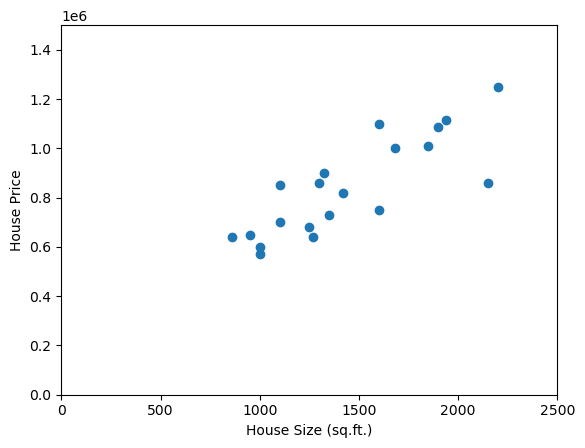

In [153]:
plt.scatter(X,Y)
plt.axis([0,2500,0,1500000])
plt.xlabel('House Size (sq.ft.)')
plt.ylabel('House Price')
plt.show()

In [159]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           8.13e-06
Time:                        22:20:25   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R^2 = 68% > 30% (good model)

In [160]:
# Expected value of Y
260800 + 402 * 1000

662800

**Alpha, Beta, R^2**

In [165]:
slope, intercept, r_value, p_value, std_error = linregress(X,Y)

In [166]:
slope

401.91628631922595

In [167]:
intercept

260806.2360560964

In [171]:
r_value**2

0.678279986579124

In [169]:
p_value

8.129642377231308e-06

In [170]:
std_error

65.24299510636492

**5. Markowitz Portfolio Optimization**

The combination of securities with little correlation allows investors to optimize their return without assuming additional risk.

In [175]:
assets = ['PG','^IXIC']
pf_data = pd.DataFrame()
for a in assets:
    pf_data[a] = yf.download(a, start='2010-1-1')['Adj Close']
pf_data.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,PG,^IXIC
Date,,
2024-11-05 00:00:00+00:00,165.759995,18439.169922
2024-11-06 00:00:00+00:00,161.050003,18983.470703
2024-11-07 00:00:00+00:00,163.410004,19269.460938
2024-11-08 00:00:00+00:00,167.710007,19286.779297
2024-11-11 00:00:00+00:00,166.029999,19298.759766


<Axes: xlabel='Date'>

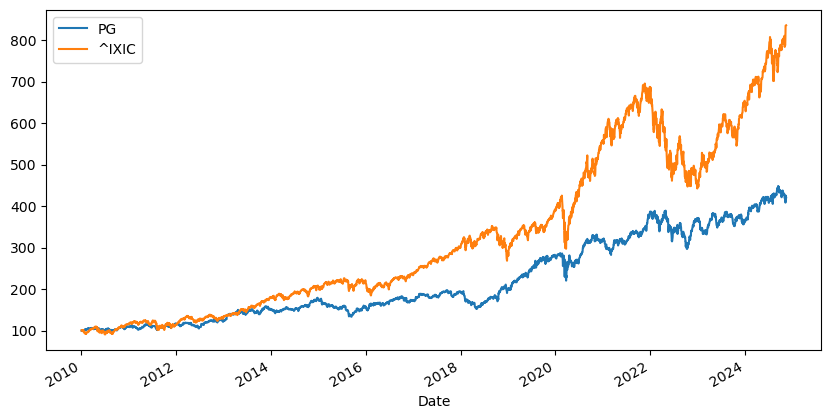

In [178]:
# Normalization to 100
(pf_data/pf_data.iloc[0]*100).plot(figsize=(10,5))

In [179]:
# Log return
log_returns = np.log(pf_data/pf_data.shift(1))
log_returns

,PG,^IXIC
Date,,
2010-01-04 00:00:00+00:00,NaN,NaN
2010-01-05 00:00:00+00:00,0.000327,0.000126
2010-01-06 00:00:00+00:00,-0.004755,-0.003306
2010-01-07 00:00:00+00:00,-0.005438,-0.000452
2010-01-08 00:00:00+00:00,-0.001323,0.007416
...,...,...
2024-11-05 00:00:00+00:00,0.004111,0.014156
2024-11-06 00:00:00+00:00,-0.028826,0.029091
2024-11-07 00:00:00+00:00,0.014548,0.014953


In [180]:
# Annual avg log return
log_returns.mean()*250

PG       0.096121
^IXIC    0.141982
dtype: float64

In [181]:
# Annual covariance matrix
log_returns.cov()*250

,PG,^IXIC
PG,0.029026,0.014739
^IXIC,0.014739,0.040997


In [182]:
# Correlation matrix
log_returns.corr()

,PG,^IXIC
PG,1.000000,0.427262
^IXIC,0.427262,1.000000


In [183]:
# Number of assets
num_assets = len(assets)
num_assets

2

In [184]:
arr = np.random.random(2)
arr

array([0.14376786, 0.79589154])

In [185]:
arr[0] + arr[1]

0.9396593956213019

In [186]:
# Randomize weights
weights = np.random.random(num_assets)
weights /= np.sum(weights) # w / sum(w)
weights

array([0.8669281, 0.1330719])

In [187]:
weights[0] + weights[1]

1.0

In [188]:
# Expected Porfolio Return
np.sum(weights * log_returns.mean())*250

0.10222403521857443

In [189]:
# Expected Porfolio Variance
np.dot(weights.T, np.dot(log_returns.cov()*250,weights))

0.025941168415261413

In [190]:
# Expected Porfolio Volatility
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250,weights)))

0.16106262265113347

In [193]:
# Consider 1000 different combinations of assets
pf_returns = []
pf_vol = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean())*250)
    pf_vol.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250,weights))))

pf_returns = np.array(pf_returns)
pf_vol = np.array(pf_vol)
pf_returns, pf_vol

(array([0.09989094, 0.10906457, 0.11681616, 0.13569853, 0.11918179,
        0.10568978, 0.13314392, 0.11975277, 0.11374439, 0.11877146,
        0.11183864, 0.10686499, 0.12874197, 0.11606502, 0.13876531,
        0.12690154, 0.1193757 , 0.11302065, 0.12076588, 0.11434509,
        0.12198251, 0.13624825, 0.12447695, 0.09815636, 0.10486211,
        0.12287939, 0.12626421, 0.1288826 , 0.11788726, 0.12159439,
        0.10047246, 0.12164396, 0.12717096, 0.1383698 , 0.12005226,
        0.12000621, 0.10385436, 0.10781624, 0.1159617 , 0.114541  ,
        0.1309006 , 0.10279161, 0.13199525, 0.11828931, 0.10040161,
        0.12298618, 0.11289731, 0.13597836, 0.11517356, 0.1240033 ,
        0.12383291, 0.13650394, 0.12427456, 0.13477033, 0.12895015,
        0.1188985 , 0.13424867, 0.1072462 , 0.10322843, 0.10445214,
        0.13716085, 0.11980974, 0.09963896, 0.11636163, 0.10157997,
        0.12484426, 0.10240106, 0.13340202, 0.10138681, 0.1157506 ,
        0.13490762, 0.11727015, 0.12982157, 0.12

In [194]:
portfolios = pd.DataFrame({'Return':pf_returns,'Volatility':pf_vol})
portfolios.head()

,Return,Volatility
0,0.099891,0.164167
1,0.109065,0.155534
2,0.116816,0.156166
3,0.135699,0.185912
4,0.119182,0.157827


Text(0.5, 1.0, 'The Efficient Frontier')

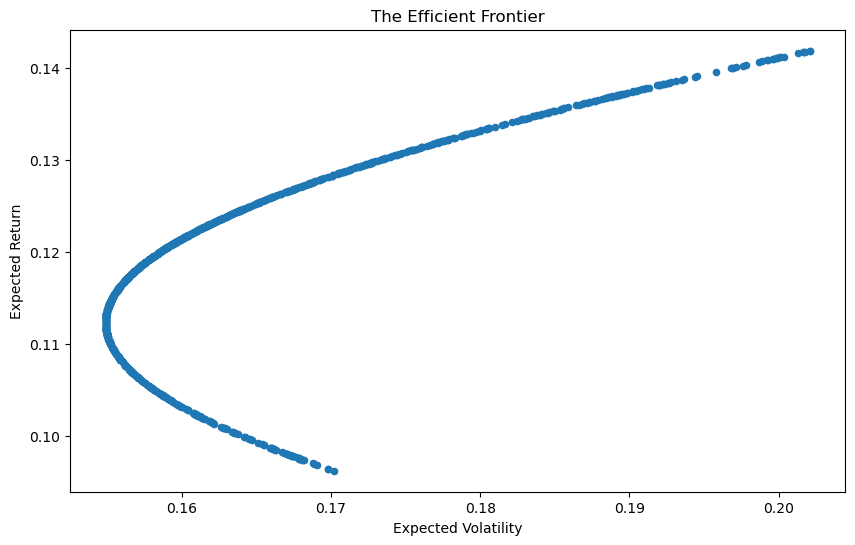

In [196]:
# The efficient frontier
portfolios.plot(x='Volatility',y='Return',kind='scatter',figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('The Efficient Frontier')

**6. The Capital Asset Pricing Model (CAPM)**

The market portfolio: a combination of all the possible investments in the world (superior risk-return, optimal in terms of risk, only systematic risk left). The market portfolio lies on the efficient frontier.

The CAPM assumes the existence of a risk-free asset (an investment with zero risk) (lower risk, lower return). Investors will allocate their money between the risk-free and the market portfolio. The Sharpe's Capital Market Line is tangent with the Efficient Frontier at the *market portfolio* (intercept point).

Safer stocks lose less during a crisis and earn less when the economy grows, vice versa for riskier stocks.

**Calculate a Security's Beta**

Beta: how risky the stock is regarding the rest of the market

**Beta = Cov(rx, rm)/(Sigma m)^2 = Sigma r,m / Sigma m**

(=0: no relationship, <1: defensive - safer than the market, >1: aggressive - riskier than the market)

Rx: stock return

Rm: market return

Sm: market risk

In [197]:
tickers = ['PG','^IXIC']
data = pd.DataFrame()
for a in assets:
    data[a] = yf.download(a, start='2012-1-1', end='2016-12-31')['Adj Close']
data.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,PG,^IXIC
Date,,
2016-12-23 00:00:00+00:00,68.414391,5462.689941
2016-12-27 00:00:00+00:00,68.124512,5487.439941
2016-12-28 00:00:00+00:00,67.697746,5438.560059
2016-12-29 00:00:00+00:00,67.923195,5432.089844
2016-12-30 00:00:00+00:00,67.705780,5383.120117


In [198]:
# Log return
sec_returns = np.log(data/data.shift(1))

# Annual covariance matrix
cov = sec_returns.cov()*250
cov

,PG,^IXIC
PG,0.020409,0.009469
^IXIC,0.009469,0.022051


In [199]:
# Covariance between the stock and the market
cov_with_market = cov.iloc[0,1]
cov_with_market

0.009469106653983544

In [200]:
# Annual market variance
market_var = sec_returns['^IXIC'].var() * 250
market_var

0.02205095387606331

**Beta**: 

Bpg = Spg,m/Sm

In [201]:
# Calculate beta and verify with PG beta on Yahoo Finance
PG_beta = cov_with_market/market_var
PG_beta

0.4294193669445938

**CAPM Formula**

The return of a stock: **Ri = A + Rf + Bim(Rm - Rf)**

Rf: risk-free (approximate with 10-year US government bond yield 2.5%)

A (alpha): how good or bad a portfolio manager is doing (=0 in standard CAPM setting, >0: outperform the market, <=0: underperform the market). A portfolio manager can participate in passive trading (investing in a market index S&P500 and waiting patiently (increasing popularity), or active trading (adjusting investment portfolios on a frequent basis). We can only compare the alpha of investments with a similar risk profile.

Bim (beta): beta betweeh the stock and the market (PG: approximate the market porfolio of the S&P500: 6.2)

Rm: market return

Rm - Rf: equity risk premium (4.5-5.5% historically)

In [202]:
# CAPM expected return for PG
PG_er = 0.025 + PG_beta * 0.05
PG_er

0.04647096834722969

**The Sharpe Ratio**

Consides both risk and return and allows comparison between stocks and between investment portfolios.

**Sharpe Ratio = (Ri - Rf)/Si** (Excess return of stock i / Standard deviation of stock i)

In [203]:
Sharpe = (PG_er - 0.025) / (sec_returns['PG'].std() * 250 ** 0.5)
Sharpe

0.1502935686326961

**7. Multivariate Regression Analysis**

**Yi = B0 + B1X1 + B2X2 + ... + BiXi + e**

We can use R^2 or p-values of beta coefficients (the probability that the beta coefficients should have been different). A low p-value means there is a low chance that the beta coeffiients are different than estimated.

A p-value < 5% means that we can be 95% confident that the beta coefficient we estimated is different than 0.

In [204]:
housing.head()

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995


In [207]:
# First set of independent variables
X = housing[['House Size (sq.ft.)','Number of Rooms','Year of Construction']]
Y = housing['House Price']

In [209]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     14.90
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           6.82e-05
Time:                        23:50:13   Log-Likelihood:                -258.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      16   BIC:                             528.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.452e+06    5.4e+06     -1.752      0.099   -2.09e+07    1.99e+06
House Size (sq.ft.)    341.8271    179.666      1.903      0.075     -39.049     722.703
Number of Rooms        1.16e+04   3.74e+04      0.310      0.760   -6.77e+04    9.08e+04
Year of Construction  4863.5761   2697.969      1.803      0.090    -855.862    1.06e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.747
Skew:                          -0.676   Prob(JB):                        0.418
Kurtosis:                       2.484   Cond. No.                     5.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [210]:
# Second set of independent variables
X = housing[['House Size (sq.ft.)','Number of Rooms']]
Y = housing['House Price']

In [211]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     18.30
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           5.77e-05
Time:                        23:51:17   Log-Likelihood:                -260.28
No. Observations:                  20   AIC:                             526.6
Df Residuals:                      17   BIC:                             529.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.737e+05   1.03e+05      2.655      0.017    5.62e+04    4.91e+05
House Size (sq.ft.)   314.1363    190.485      1.649      0.117     -87.752     716.025
Number of Rooms      1.944e+04   3.95e+04      0.492      0.629   -6.39e+04    1.03e+05
==============================================================================
Omnibus:                        1.326   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                0.810
Skew:                          -0.487   Prob(JB):                        0.667
Kurtosis:                       2.853   Cond. No.                     5.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [214]:
# Third set of independent variables
X = housing[['House Size (sq.ft.)','Year of Construction']]
Y = housing['House Price']

In [215]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     23.55
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           1.26e-05
Time:                        23:53:22   Log-Likelihood:                -258.49
No. Observations:                  20   AIC:                             523.0
Df Residuals:                      17   BIC:                             526.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.654e+06   5.21e+06     -1.852      0.081   -2.07e+07    1.34e+06
House Size (sq.ft.)    394.0417     61.098      6.449      0.000     265.137     522.947
Year of Construction  4960.9407   2607.443      1.903      0.074    -540.283    1.05e+04
==============================================================================
Omnibus:                        2.064   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.356   Jarque-Bera (JB):                1.689
Skew:                          -0.663   Prob(JB):                        0.430
Kurtosis:                       2.480   Cond. No.                     5.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [216]:
# Fourth set of independent variables
X = housing[['Number of Rooms','Year of Construction']]
Y = housing['House Price']

In [217]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     17.79
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           6.79e-05
Time:                        23:53:23   Log-Likelihood:                -260.47
No. Observations:                  20   AIC:                             526.9
Df Residuals:                      17   BIC:                             529.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.471e+06   5.77e+06     -1.468      0.160   -2.06e+07     3.7e+06
Number of Rooms       7.824e+04    1.4e+04      5.574      0.000    4.86e+04    1.08e+05
Year of Construction  4424.7160   2887.793      1.532      0.144   -1667.996    1.05e+04
==============================================================================
Omnibus:                        2.115   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                1.400
Skew:                          -0.407   Prob(JB):                        0.497
Kurtosis:                       1.991   Cond. No.                     4.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Year of Construction has a high p-value so it doesn't really affect house prices. If we gather more data about more observations, the p-values of House Size and Number of Rooms might decrease. House Size and Number of Rooms could also be related. While we can select the model with the highest R^2 (68%), we could gather more data about explanatory variables( eg. distance between the House and Downtown, number of supermarkets, etc.)

**8. Monte-Carlos Simulations**

To observe the different possible realizations of an event, we can use past data to create a simulation - a new set of fictional but sensible data.

To predict the firm's future gross profit, we will start by performing 1,000 simulations of the company's expected revenues.

**Current Revenue = Last Revenue x (1 + growth rate)^e**

In [219]:
# Revenue mean (based on last year's revenue), standard deviation, iterations
rev_m = 170
rev_stdev = 20
iterations = 1000

rev = np.random.normal(rev_m,rev_stdev, iterations) # using normal distribution
rev

array([170.18883243, 159.04252225, 175.48517189, 180.16633697,
       174.13126178, 193.15864209, 190.34547302, 157.06245399,
       147.48547455, 174.35047377, 181.00894265, 220.42184105,
       165.02535   , 205.27494372, 158.93813615, 176.88587676,
       153.68470722, 193.40898399, 131.91204589, 135.01601077,
       160.08222087, 153.06435157, 146.97851645, 177.03292928,
       172.91189485, 188.53574226, 170.49616562, 152.50189429,
       184.91837297, 177.34230037, 157.72392434, 199.42857541,
       192.39561092, 151.60493297, 207.76834219, 182.11662658,
       158.93691518, 154.31491397, 172.68887594, 135.24728535,
       160.42430685, 153.59248153, 208.03874782, 194.31074745,
       156.78686968, 175.40948915, 180.10423836, 188.11670434,
       185.94701142, 163.11220887, 161.88232162, 148.03113586,
       189.98072368, 201.18193782, 149.68307102, 176.03019929,
       172.16461668, 155.68524924, 176.72703807, 170.92078437,
       151.26968544, 189.829514  , 163.5324158 , 188.59

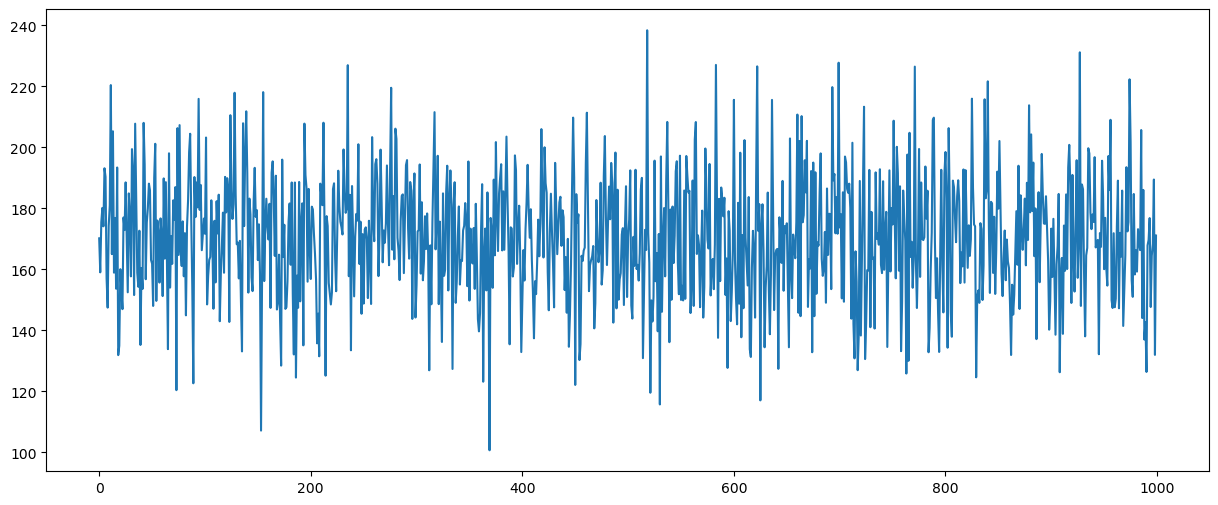

In [221]:
plt.figure(figsize=(15,6))
plt.plot(rev)
plt.show()

Revenues are within the range of 170-20 and 170+20.

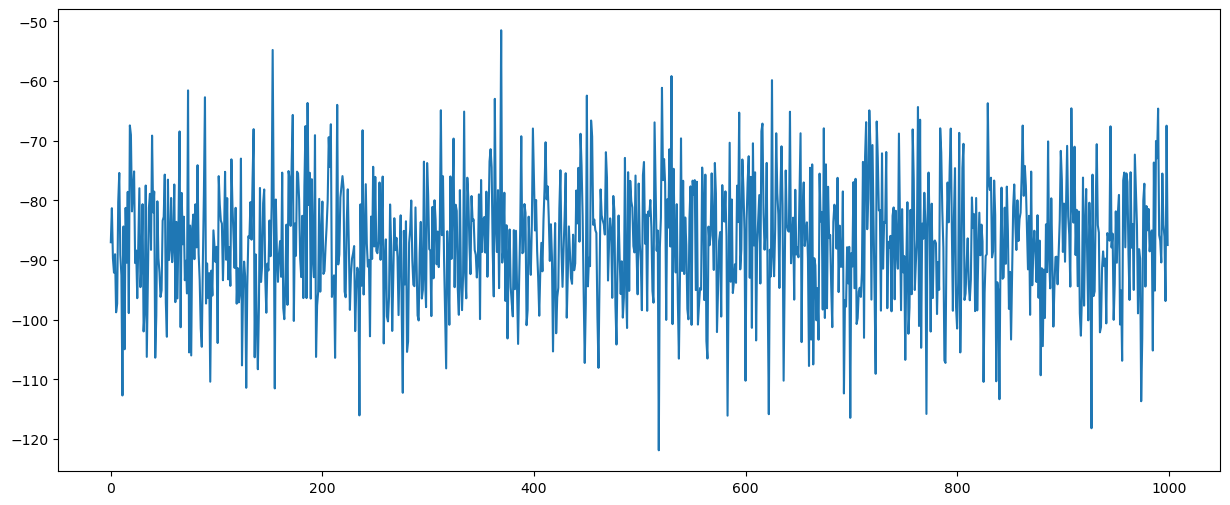

In [222]:
# Normal distribution of COGS shows that it contributes to 60% of revenues with a std dev of 10% regardless the mean of COGS
COGS = - (rev * np.random.normal(0.6,0.1)) 

plt.figure(figsize=(15,6))
plt.plot(COGS)
plt.show()

In [223]:
COGS.mean()

-87.17084394763238

In [224]:
COGS.std()

10.394441388220331

COGS are within the range of -87-10 and 87+10.

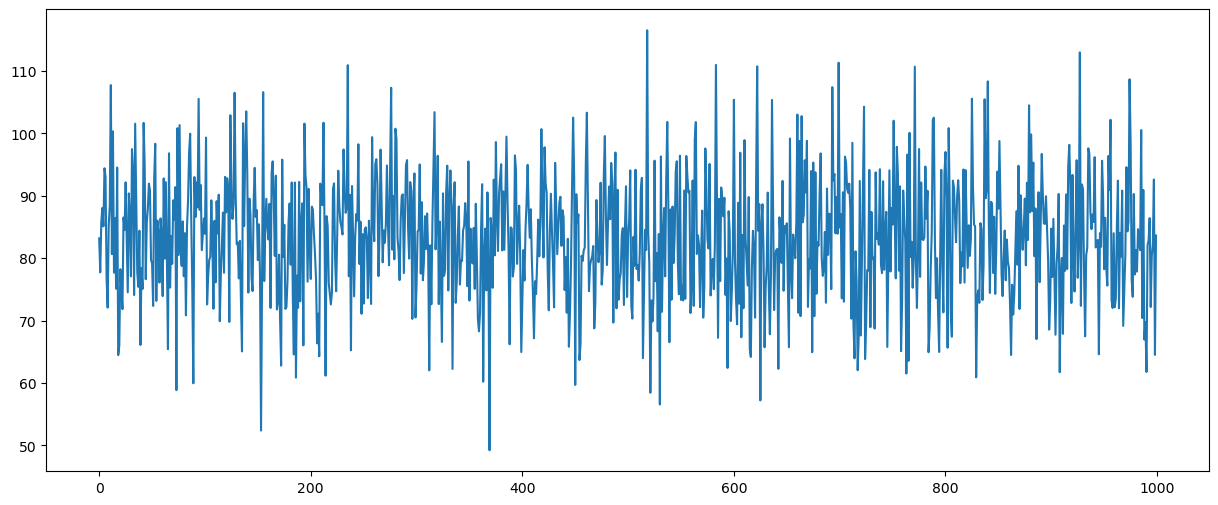

In [227]:
# Gross profit
gp = rev + COGS
#gp

plt.figure(figsize=(15,6))
plt.plot(gp)
plt.show()

In [228]:
max(gp)

116.50087354014694

In [229]:
min(gp)

49.223151330674476

In [230]:
gp.mean()

83.31978130173444

In [232]:
gp.std()

9.935232286388084

Gross Profits are within the range of 83-10 and 83+10.

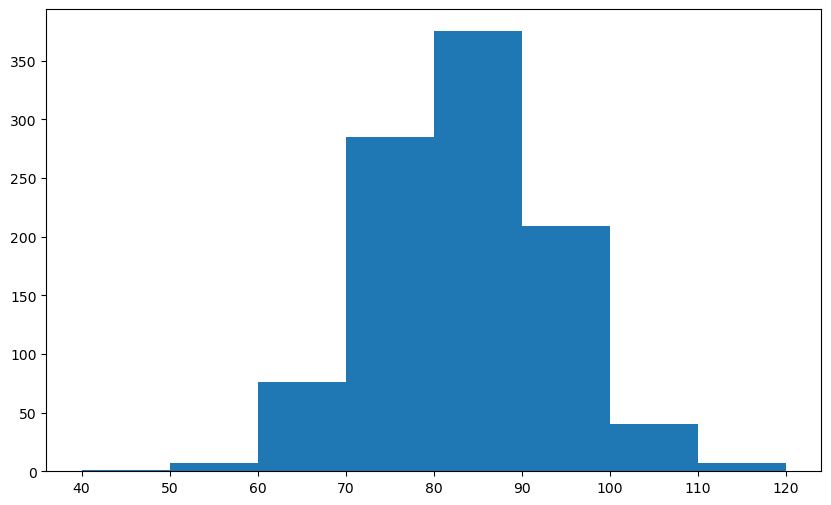

In [233]:
plt.figure(figsize=(10,6));
plt.hist(gp, bins=[40,50,60,70,80,90,100,110,120])
plt.show()

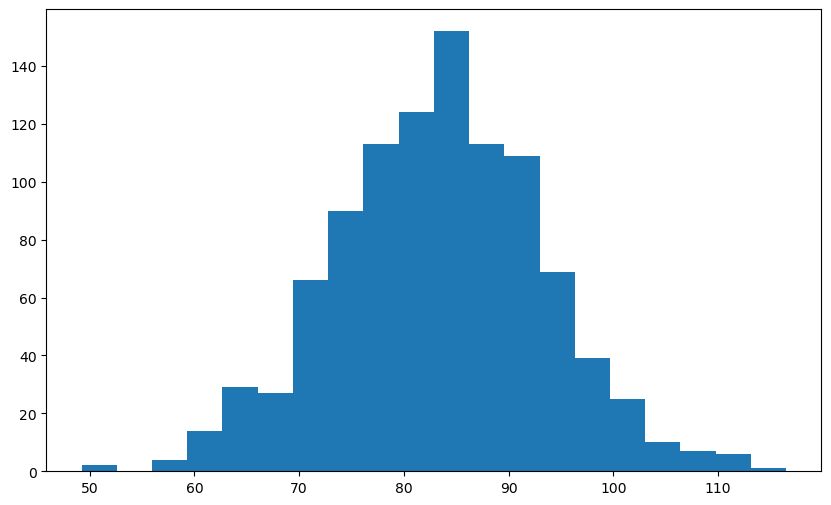

In [234]:
plt.figure(figsize=(10,6));
plt.hist(gp, bins=20)
plt.show()

**Forecast Stock Prices with a Monte-Carlos Simulation**

**Price Today (P1) = Price Yesterday (P0) x e^r**

r: log return of the share price between today and yesterday

e^r: daily returns

e^ln(x) = x

e^r = ln (P1/P0)

P1 = P0 x e^ln(P1/P0) = P0 x e^r

We use **Brownian motoion** to model r: 

**r = Drift + std dev x e^r**

1. Drift (the direction rates of return have been headed in the past -> ln(P1/O0)

Calculate average, standard deviation and variance of daily returns in the historical period:

**Drift (Expected daily return of the stock) = mu - 1/2 x sigma^2**

2. Volatility (random variable)

**Random Variable = sigma x Z(Rand(0;1))**

Rand(0;1) is a percentage in the standard normal distribution (probability of being within +/-N standard deviations of the mean): 68%, 96%, 99.7%, 100%

**Price Today = Price Yesterday x e^[Drift + Random Variable]**

**P1 = P0 x e^[(mu - 1/2 x sigma^2)+sigma x Z(Rand(0;1))]**

If we repeat this calculation of price today 1000 times, we'll be able to simulate the stock price of tomorrow.

In [235]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = yf.download(ticker, start='2007-1-1')['Adj Close']
data.head()

[*********************100%***********************]  1 of 1 completed


,PG
Date,
2007-01-03 00:00:00+00:00,38.616390
2007-01-04 00:00:00+00:00,38.323227
2007-01-05 00:00:00+00:00,37.994125
2007-01-08 00:00:00+00:00,38.077908
2007-01-09 00:00:00+00:00,37.982159


In [236]:
# Log return
log_returns = np.log(1 + data.pct_change())
log_returns.tail()

,PG
Date,
2024-11-05 00:00:00+00:00,0.004111
2024-11-06 00:00:00+00:00,-0.028826
2024-11-07 00:00:00+00:00,0.014548
2024-11-08 00:00:00+00:00,0.025974
2024-11-11 00:00:00+00:00,-0.010068


<Axes: xlabel='Date'>

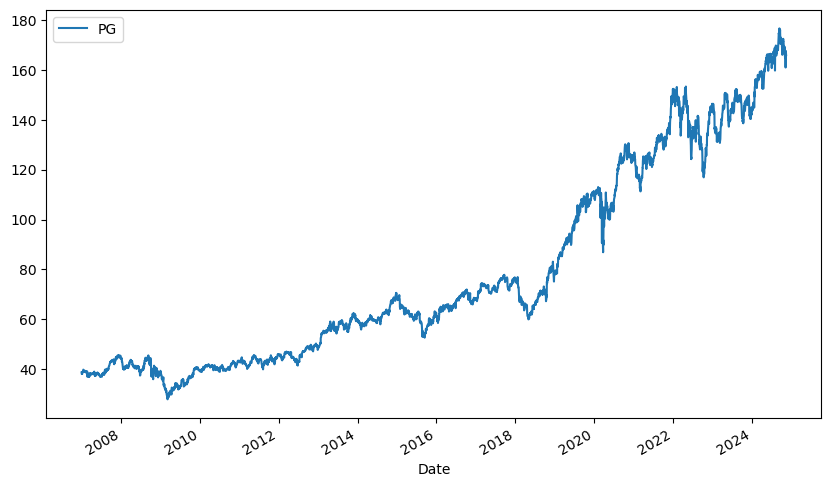

In [237]:
# Stock price graph
data.plot(figsize=(10,6))

<Axes: xlabel='Date'>

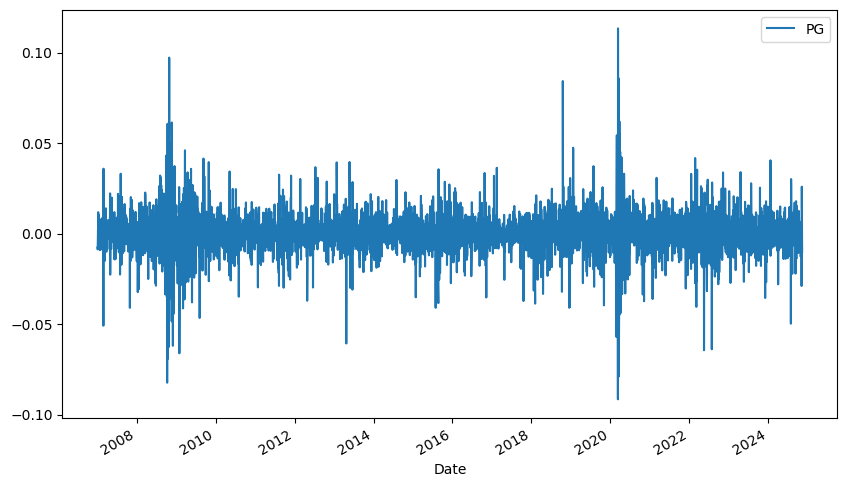

In [238]:
# Log return graph
log_returns.plot(figsize=(10,6))

In [239]:
# Avg log return (mu)
u = log_returns.mean()
u

PG    0.000324
dtype: float64

In [240]:
# Log return variance
var = log_returns.var()
var

PG    0.000135
dtype: float64

In [241]:
# Drift
drift = u - 1/2 * var
drift

PG    0.000257
dtype: float64

In [242]:
# Standard deviation
stdev = log_returns.std()
stdev

PG    0.011631
dtype: float64

In [243]:
type(drift)

pandas.core.series.Series

In [244]:
type(stdev)

pandas.core.series.Series

In [245]:
np.array(drift)

array([0.00025683])

In [246]:
drift.values

array([0.00025683])

In [247]:
stdev.values

array([0.01163111])

In [250]:
norm.ppf(0.95)

1.6448536269514722

In [252]:
x = np.random.rand(10,2)
x

array([[0.37790518, 0.32262213],
       [0.49055032, 0.55521437],
       [0.25669693, 0.21720508],
       [0.503971  , 0.96855904],
       [0.32815332, 0.40314595],
       [0.27654337, 0.49050797],
       [0.39292538, 0.09763981],
       [0.77610268, 0.0122805 ],
       [0.3537545 , 0.78421892],
       [0.45925002, 0.89973257]])

In [253]:
norm.ppf(x)

array([[-0.3109872 , -0.46037893],
       [-0.02368905,  0.13884673],
       [-0.65356226, -0.78166723],
       [ 0.00995399,  1.86002544],
       [-0.44501814, -0.2452125 ],
       [-0.59314107, -0.02379522],
       [-0.27170254, -1.29511773],
       [ 0.75909683, -2.24823829],
       [-0.37520368,  0.78652129],
       [-0.10232332,  1.28002921]])

In [254]:
# Z corresponds to the distance between the mean and the events, expressed as the number of standard deviations
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 1.12466119, -1.82696888],
       [ 0.02959506, -0.17157302],
       [-0.78291911,  1.09876718],
       [ 0.54172739,  0.34549048],
       [-0.72136866,  0.58195182],
       [-0.46977227,  1.23862332],
       [-0.83754889,  0.27996819],
       [-1.23981125, -1.69533358],
       [ 0.41998881,  1.23642254],
       [-0.44045078, -0.29726751]])

In [255]:
t_intervals = 1000
iterations = 10

daily returns = e^r

r = drift + std dev * Z

In [256]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.02444568, 1.00619882, 1.01403041, ..., 0.99884996, 0.99641761,
        0.9829419 ],
       [1.00932363, 0.9955951 , 0.99268073, ..., 0.99488762, 0.99277674,
        0.99388088],
       [0.9983666 , 0.98850639, 1.02634127, ..., 0.99756634, 0.99778613,
        1.02056197],
       ...,
       [0.99206497, 0.99791089, 1.00505729, ..., 0.99855267, 0.99325606,
        0.99884947],
       [1.01130045, 1.00555381, 0.9957169 , ..., 1.01667152, 0.99821367,
        1.00584704],
       [1.01040839, 1.00334299, 0.99285888, ..., 0.99663748, 1.0074124 ,
        1.00434971]])

**Stock Price Prediction**

St = S0 * daily_returns t

S(t+1) = St * daily_returns(t+1)

...

S(t+999) = S(t+998) * daily_returns(t+999)

In [257]:
# Stock price today
S0 = data.iloc[-1]
S0

PG    166.029999
Name: 2024-11-11 00:00:00+00:00, dtype: float64

In [258]:
# Create an array of 0's to fill in with a loop
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [259]:
# Initial price
price_list[0] = S0
price_list

array([[166.02999878, 166.02999878, 166.02999878, ..., 166.02999878,
        166.02999878, 166.02999878],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [260]:
# Fill in the rest of the prices
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]
price_list

array([[166.02999878, 166.02999878, 166.02999878, ..., 166.02999878,
        166.02999878, 166.02999878],
       [167.57800063, 165.29865307, 164.81477963, ..., 165.18118957,
        164.83072115, 165.01404078],
       [167.30427797, 163.39877497, 169.1562102 , ..., 164.77919479,
        164.46580777, 168.40705507],
       ...,
       [306.28651432, 176.62961854, 164.54490782, ..., 178.07636417,
        127.27706138, 323.22318907],
       [309.74769027, 177.61058624, 163.84014571, ..., 181.04516701,
        127.04970255, 325.11308664],
       [312.97166409, 178.20433603, 162.67014374, ..., 180.4363991 ,
        127.99144606, 326.52723441]])

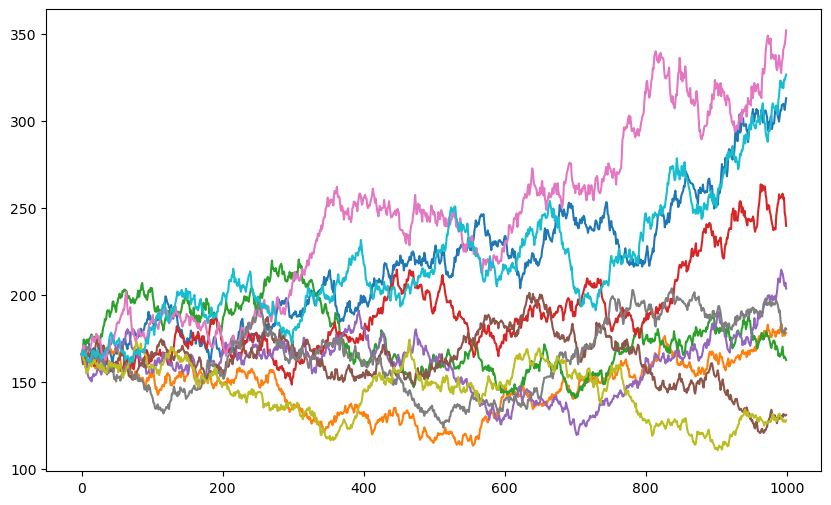

In [262]:
plt.figure(figsize=(10,6))
plt.plot(price_list);

**Derivative Contracts**

A derivative is a financial instrument, whose price is derived based on the development of one or more underlying assets (stocks, bonds, interest rates, commodities, exchange rates). It is a contract involving at least 2 parties describing how they will exchange payments.

Trading derivatives: regulated markets (a uniform contract structure), over the counter markets. Originally, derivatives serve as a hedging instrument. With time financial institutions evolved significantly: hedging, speculating, arbitrageurs.

4 main types of derivatives: forwards, futures, swaps, options

1. Forwards: 2 parties agree that one party will sell to the other an underlying asset at a future point of time

2. Futures: highly standardized forward contracts

3. Swaps: 2 parties agree to exchange cash flows based on an underlying asset (interest rate, stock price, bond price, commodity)

4. Options: a contract that enables its owner to buy or sell an underlying asset at a given price, can be exercised until a certain date

Call Options (option to buy an asset) vs Put Options (option to sell an asset)

European Options (exercised at maturity) vs American Options (exercised at any time)

**The Black Schole Formula**

Calculates the value of an option by taking the difference betwween the amount you get if you exercise the option minus the amount you have to pay if you exercise the option 

**Call Option Price: C(S,t) = N(d1)S - N(d2)Ke^[-r(T-t)]**

**d1 = 1/[s x sqrt(T-t)] x [ln(S/k) + (r + s^2/2)(T-t)]** (how much we can expect if the option is exercised)

**d2 = d1 - s x sqrt(T-t)** (the amount we must pay when exercising the option)

S: current stock price

K: option strike price

t: time until option expires (time horizon: years)

r: risk-free interest rate

s: sample standard deviation

N: Standard Normal distribution

e: exponential term

C: call premium

**The Black-Schole-Merton Formula**

**d1 = [ln(S/k) + (r + stdev^2/2)t]/[s x sqrt(t)]**

**d2 = d1 - s x sqrt(t) = [ln(S/k) + (r - stdev^2/2)t]/[s x sqrt(t)]**

**C = SN(d1) - KN(d2)e^(rt)**

The Black Schole Framework: efficient markets, transaction costs, no dividend payments, known volatility and risk-free - calculate the value of an option

A Call Option's Payoff: Strike Price vs Share Price

Share Price > Strike Price -> exercise (positive result)

Share Price < Strike Price -> don't exercise (negative result)

In [281]:
def d1(S, K, r, stdev, T):
    return (np.log(S/K) + (r+stdev**2/2)*T) / (stdev * np.sqrt(T))

def d2(S, K, r, stdev, T):
    return (np.log(S/K) + (r-stdev**2/2)*T) / (stdev * np.sqrt(T))

In [265]:
# Cumulation distribution function (how data accumulates in time)
norm.cdf(0) # half the data lies below the value

0.5

In [266]:
norm.cdf(0.5) 

0.6914624612740131

In [267]:
norm.cdf(0.75)

0.7733726476231317

In [269]:
norm.cdf(9)

1.0

In [270]:
def BSM(S, K, r, stdev, T):
    return (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r*T) * norm.cdf(d2(S, K, r, stdev, T)))

In [272]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = yf.download(ticker, start='2007-1-1', end='2017-12-31')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [274]:
S = data.iloc[-1]
S

PG    76.301193
Name: 2017-12-29 00:00:00+00:00, dtype: float64

In [276]:
log_returns = np.log(1+data.pct_change())
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.17221
dtype: float64

In [277]:
r = 0.025
K = 110.0
T = 1

In [282]:
d1(S, K, r, stdev, T)

PG   -1.892822
dtype: float64

In [283]:
d2(S, K, r, stdev, T)

PG   -2.065033
dtype: float64

In [284]:
BSM(S, K, r, stdev, T)

PG    0.139546
Name: 2017-12-29 00:00:00+00:00, dtype: float64

This is the price of the call option. We'll calculate stock price.

**Euler Discretization**

Stock Price: **St = S(t-1) x e^[(r-stdev^2/2) x sigma(t) + stdev x sqrt(sigma(t)) x Zt]**

Monte Carlo simulations can provide thousands of possible call option prices. We could average the payoff and discount it back to today.

In [285]:
r = 0.025

log_returns = np.log(1+data.pct_change())
stdev = log_returns.std()*250**0.5
stdev

PG    0.17221
dtype: float64

In [286]:
type(stdev)

pandas.core.series.Series

In [287]:
stdev = stdev.values
stdev

array([0.17221033])

In [294]:
T = 1.0
t_intervals = 250
delta_t = T / t_intervals
iterations = 10000
Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

In [295]:
# Stock prices
for t in range(1, t_intervals+1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev**2) * delta_t + stdev * delta_t**0.5 * Z[t])
S

array([[ 76.30119324,  76.30119324,  76.30119324, ...,  76.30119324,
         76.30119324,  76.30119324],
       [ 75.56110289,  76.95340475,  75.30199204, ...,  76.97794123,
         76.61782048,  76.47367157],
       [ 74.91467722,  76.49766629,  73.98799066, ...,  77.95794816,
         76.23521511,  78.22570221],
       ...,
       [ 90.96356909, 108.29150579,  57.58183223, ...,  82.00661545,
         67.94530756,  87.88686718],
       [ 92.3073047 , 109.85255314,  57.80361873, ...,  79.5915014 ,
         68.61933167,  88.55588508],
       [ 92.28639757, 110.64280176,  58.09698438, ...,  80.31003247,
         67.30308759,  87.47212461]])

In [296]:
S.shape

(251, 10000)

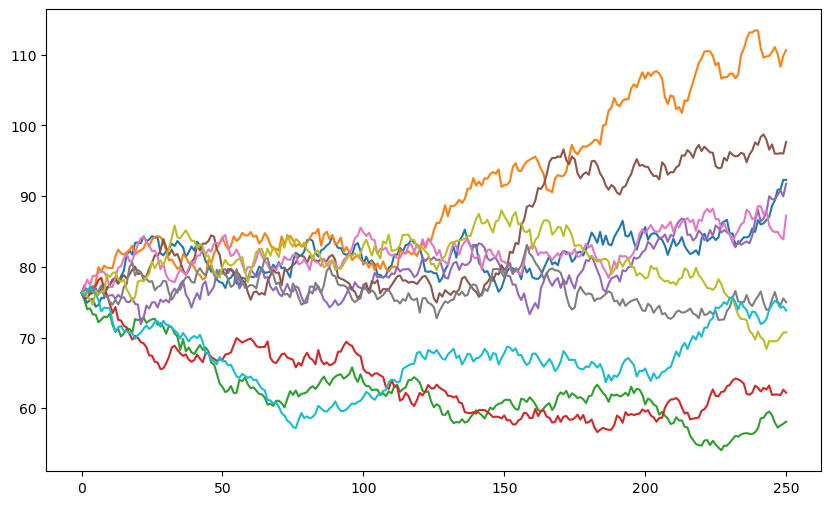

In [298]:
# Limit graph to show first 10 rows
plt.figure(figsize=(10,6))
plt.plot(S[:, :10]);

In [299]:
# Payoff of a call option
p = np.maximum(S[-1]-100, 0) # creates an array containing either 0s or the numbers equal to the differences
p

array([ 0.        , 10.64280176,  0.        , ...,  0.        ,
        0.        ,  0.        ])

In [300]:
p.shape

(10000,)

**C = e^(-rT) x sum(Pi) / iterations**

Call Option: 

Buy if: S - K > 0

Don't Buy if: S - K < 0

In [301]:
C = np.exp(-r * T) * np.sum(p) / iterations
C

0.5350244881293886

C value is not so different from the Black-Schole value.